In [2]:
%matplotlib inline
from karabo_data import RunDirectory
#import karabo_data
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
run = RunDirectory('../data/SCS/201831/p900048/raw/r0183/')

In [6]:
df = run.get_dataframe(fields=[("*_XGM/*", "*.i[xy]Pos"), ("*_XGM/*", "*.photonFlux")])

In [7]:
xtd10_intensity = run.get_array('SA3_XTD10_XGM/XGM/DOOCS:output', 'data.intensityTD')[:, :120]
SCS_intensity = run.get_array('SCS_BLU_XGM/XGM/DOOCS:output', 'data.intensityTD')[:, :120]

In [8]:
xtd10_intensity, SCS_intensity = xr.align(xtd10_intensity, SCS_intensity, join='inner')

Text(0, 0.5, 'SCS single-shot energy 7th bunch (microJ)')

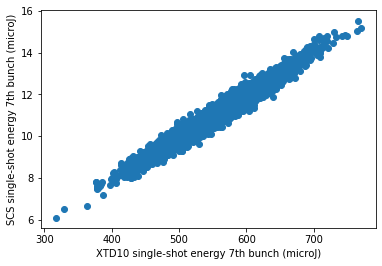

In [9]:
n=1
plt.scatter(xtd10_intensity[:, n], SCS_intensity[:, n])
plt.xlabel('XTD10 single-shot energy 7th bunch (microJ)')
plt.ylabel('SCS single-shot energy 7th bunch (microJ)')

Text(0, 0.5, 'SCS single-shot energy (microJ)')

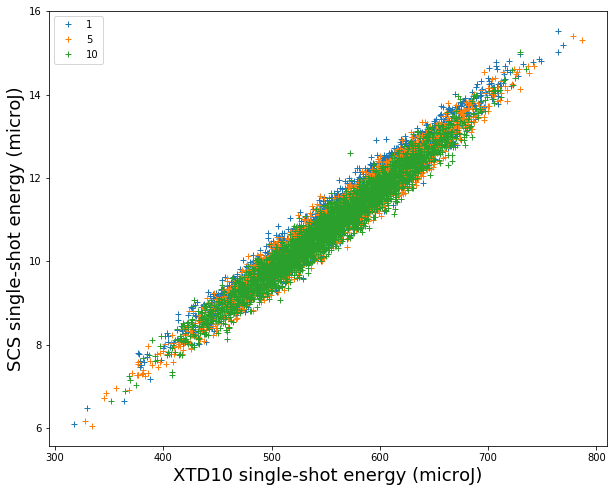

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

for pulse in [1, 5, 10]:
    ax.plot(xtd10_intensity[:, pulse], SCS_intensity[:, pulse], linestyle='none', marker='+', label=pulse)
ax.legend()
plt.xlabel('XTD10 single-shot energy (microJ)', size=18)
plt.ylabel('SCS single-shot energy (microJ)', size=18)